In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# read in EK
ek_structure_frxn = pd.read_csv(
    "secondary_structure/structure_EK.txt", sep='\s+', index_col="temp"
)
ek_structure_salt_bridge_frxn = pd.read_csv(
    "secondary_structure/salt_bridge_per_structure_EK.txt", sep='\s+', index_col="temp"
)
ek_salt_bridge_entropy = pd.read_csv(
    "salt_bridges/temp_compare_EK.txt", sep='\s+', index_col="temp"
)
# polyG for reference
gg_structure_frxn = pd.read_csv(
    "secondary_structure/structure_GG.txt", sep='\s+', index_col="temp"
)
gg_salt_bridge_entropy = pd.read_csv(
    "salt_bridges/temp_compare_GG.txt", sep='\s+', index_col="temp"
)

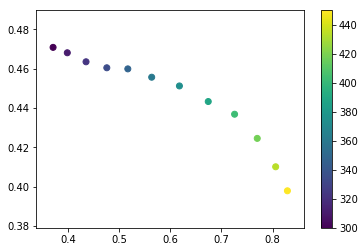

In [2]:
plt.scatter(
    ek_salt_bridge_entropy['conf_entropy'] / gg_salt_bridge_entropy.loc[300, 'conf_entropy'], 
    ek_salt_bridge_entropy['salt_bridges'] / 15, 
    c=ek_salt_bridge_entropy.index
)
cbar = plt.colorbar()
plt.savefig('ek-entropy-vs-saltbridges.png', dpi=300, bbox_inches='tight')

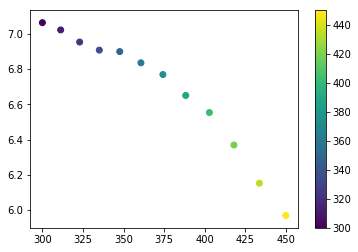

In [3]:
plt.scatter(
    ek_salt_bridge_entropy.index, 
    ek_salt_bridge_entropy['salt_bridges'], 
    c=ek_salt_bridge_entropy.index
)
cbar = plt.colorbar()

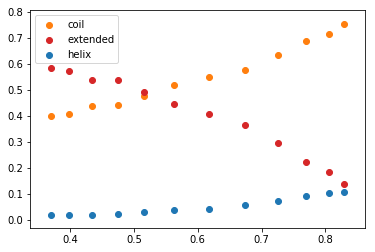

In [4]:
plt.scatter(
    ek_salt_bridge_entropy['conf_entropy'] / gg_salt_bridge_entropy.loc[300, 'conf_entropy'], 
    ek_structure_frxn['coil'], 
    color="tab:orange",
    label='coil',
)
plt.scatter(
    ek_salt_bridge_entropy['conf_entropy'] / gg_salt_bridge_entropy.loc[300, 'conf_entropy'],  
    ek_structure_frxn['extended'], 
    color="tab:red",
    label='extended',
)
plt.scatter(
    ek_salt_bridge_entropy['conf_entropy'] / gg_salt_bridge_entropy.loc[300, 'conf_entropy'], 
    ek_structure_frxn['helix'], 
    color="tab:blue",
    label='helix'
)
plt.legend()
plt.savefig('ek-structure-vs-entropy.png', dpi=300, bbox_inches='tight')

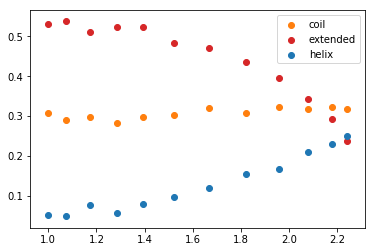

In [5]:
plt.scatter(
    ek_salt_bridge_entropy['conf_entropy'] / ek_salt_bridge_entropy['conf_entropy'].min(), 
    ek_structure_salt_bridge_frxn['coil'], 
    color="tab:orange",
    label='coil',
)
plt.scatter(
    ek_salt_bridge_entropy['conf_entropy'] / ek_salt_bridge_entropy['conf_entropy'].min(), 
    ek_structure_salt_bridge_frxn['extended'], 
    color="tab:red",
    label='extended',
)
plt.scatter(
    ek_salt_bridge_entropy['conf_entropy'] / ek_salt_bridge_entropy['conf_entropy'].min(), 
    ek_structure_salt_bridge_frxn['helix'], 
    color="tab:blue",
    label='helix',
)
plt.legend()

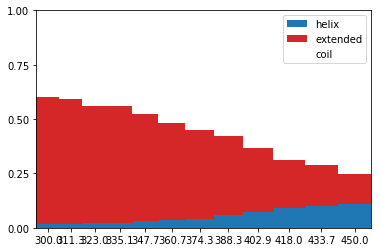

In [9]:
arr0 = np.array(ek_structure_frxn.index)
width = arr0[1:] - arr0[:-1]
width = list(width)
width.append(width[-1])

plt.bar(
    ek_structure_frxn.index, 
    ek_structure_frxn['helix'], 
    width, 
    color='tab:blue',
    label='helix',
)
plt.bar(
    ek_structure_frxn.index, 
    ek_structure_frxn['extended'], 
    width, 
    bottom=ek_structure_frxn['helix'],
    color='tab:red',
    label='extended',
)
plt.bar(
    ek_structure_frxn.index, 
    ek_structure_frxn['coil'], 
    width,
    bottom=(ek_structure_frxn['extended'] + ek_structure_frxn['helix']),
    color='white',
    label='coil',
)
plt.ylim([0, 1])
plt.xlim([300 - width[0] / 2, 450 + width[-1] / 2])
plt.yticks([0, 0.25, 0.5, 0.75, 1.0])
plt.xticks(ek_structure_frxn.index)
plt.legend()
plt.savefig('ek-structure-frxn.png', dpi=300, bbox_inches='tight')

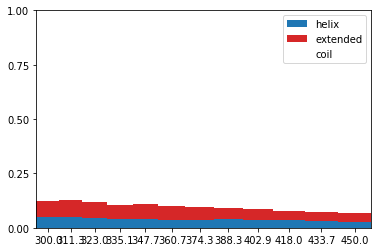

In [10]:
arr0 = np.array(gg_structure_frxn.index)
width = arr0[1:] - arr0[:-1]
width = list(width)
width.append(width[-1])

plt.bar(
    gg_structure_frxn.index, 
    gg_structure_frxn['helix'], 
    width, 
    color='tab:blue',
    label='helix',
)
plt.bar(
    gg_structure_frxn.index, 
    gg_structure_frxn['extended'], 
    width, 
    bottom=gg_structure_frxn['helix'],
    color='tab:red',
    label='extended',
)
plt.bar(
    gg_structure_frxn.index, 
    gg_structure_frxn['coil'], 
    width,
    bottom=(gg_structure_frxn['extended'] + gg_structure_frxn['helix']),
    color='white',
    label='coil',
)
plt.ylim([0, 1])
plt.xlim([300 - width[0] / 2, 450 + width[-1] / 2])
plt.yticks([0, 0.25, 0.5, 0.75, 1.0])
plt.xticks(gg_structure_frxn.index)
plt.legend()
plt.savefig('gg-structure-frxn.png', dpi=300, bbox_inches='tight')

In [8]:
ek_structure_frxn.index

Float64Index([             300.0,            311.264,            322.952,
              335.07800000000003,             347.66,            360.714,
              374.25800000000004,            388.311, 402.89099999999996,
                         418.019,            433.715,              450.0],
             dtype='float64', name='temp')